In this notebook:
    - station data and normalized temperature evolution data are merged
    - plot evolution and regression focusing in Barcelona

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time as t
import re
from sklearn import datasets, linear_model
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import matplotlib.patches as mpatches

In [3]:
#import stations with isUrban flag for selected cols
cols = ['Station ID','Station Name', 'Latitude','Longitude','Elevation (m)', 'isUrban' ]
df_stations = pd.read_csv('Dades/OUTPUT XX Filtered Stations Urban-No Urban.csv', skipinitialspace = True, usecols = cols)

In [4]:
#import dades normalitzades
df = pd.read_csv('Dades/OUTPUT 04 Dades Normalitzades.csv')

In [5]:
#merge data with urban information
df_urban = pd.merge(df,df_stations,how='inner',  on ='Station ID')

In [6]:
df_isUrban_byyear = df_urban.pivot_table(index='Year',columns='isUrban',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

In [7]:
df_station_byyear = df_urban.pivot_table(index='Year',columns=['Station ID'],values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

#Barcelona analysis

In [8]:
Barcelona_Stations = []
for stations in df_stations['Station ID']:
    if re.search('BARCELONA.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        Barcelona_Stations.append(stations)
print Barcelona_Stations

[285, 22888, 22889, 22890]


In [9]:
#DataFrame with Barcelona Stations

not_Barcelona_Stations = []
for stations in df_stations['Station ID']:
    if not re.search('BARCELONA.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        not_Barcelona_Stations.append(stations)

df_Barcelona_stations = df_stations
for notbcnstations in not_Barcelona_Stations:
        df_Barcelona_stations  = df_Barcelona_stations[df_Barcelona_stations['Station ID'] != notbcnstations]
        
print df_Barcelona_stations

    Station ID                              Station Name  Latitude  Longitude  \
1          285  BARCELONA AP EL PRATc                     41.29167     2.0750   
22       22888  BARCELONA                                 41.40000     2.2000   
23       22889  BARCELONA CITY                            41.41700     2.1500   
24       22890  BARCELONA                                 41.41920     2.1253   

    Elevation (m)  isUrban  
1           1.600        1  
22         93.775        1  
23        178.000        1  
24        412.000        1  


In [10]:
#merge data with urban information
df_Barcelona = pd.merge(df_Barcelona_stations,df,how='inner',  on ='Station ID')

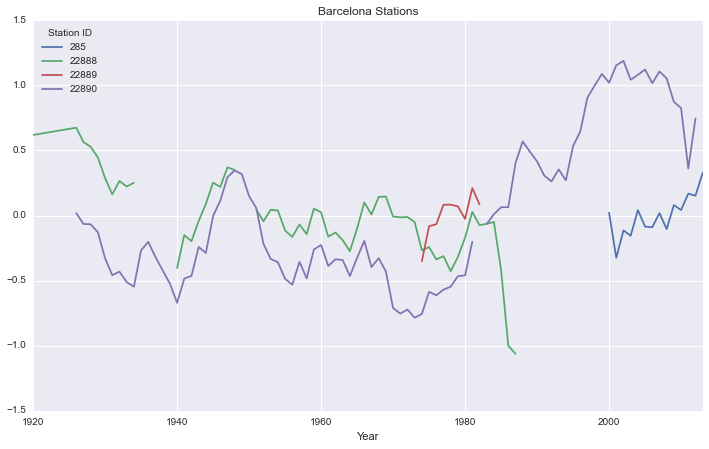

In [11]:
#evolution for each station
df_isUrban_byyearB = df_Barcelona.pivot_table(index='Year',columns='Station ID',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')
df_isUrban_byyearB.plot(xlim=(1920,2013),figsize=(12,7), title = 'Barcelona Stations')

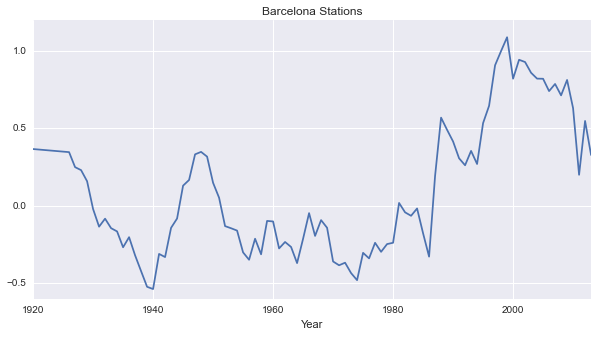

In [12]:
#evolution grouping all stations
df_Barcelona_byyear = df_Barcelona.pivot_table(index='Year',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')
df_Barcelona_byyear.plot(xlim=(1920,2013),figsize=(10,5), title = 'Barcelona Stations')

1) Regression Barcelona vs nonUrban grouping by year and station 

Barcelona
Coefficient: 0.0091
Residual sum of squares: 0.13
Variance score: 0.31

NON Urban
Coefficient: 0.0057
Residual sum of squares: 0.09
Variance score: 0.29


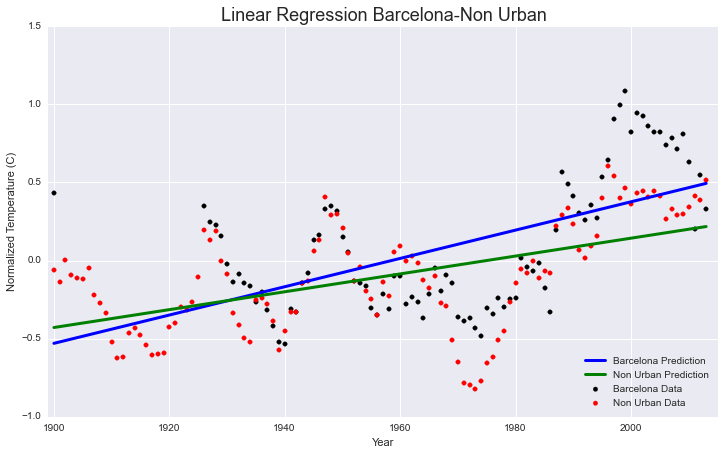

In [13]:
#Barcelona regression
regr = linear_model.LinearRegression()
Barcelona_X = pd.DataFrame(df_Barcelona_byyear.index)
Barcelona_Y = pd.DataFrame(df_Barcelona_byyear.values)
regr.fit(Barcelona_X,Barcelona_Y)

#non urban regression
df_isUrban_byyear_stacked = df_isUrban_byyear.stack()
df_nonUrban_byYear = df_isUrban_byyear_stacked[:,0]

regr2 = linear_model.LinearRegression()
Non_Urban_X = pd.DataFrame(df_nonUrban_byYear.index)
Non_Urban_Y = pd.DataFrame(df_nonUrban_byYear.values)
regr2.fit(Non_Urban_X,Non_Urban_Y)



# The coefficients
print "Barcelona"
print 'Coefficient:', round(regr.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(Barcelona_X) - Barcelona_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Barcelona_X, Barcelona_Y) )

print "\nNON Urban"
print 'Coefficient:', round(regr2.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(Non_Urban_X) - Non_Urban_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(Non_Urban_X, Non_Urban_Y))

# Plot outputs
plt.figure(figsize=(12,7))
plt.scatter(Barcelona_X, Barcelona_Y,  color='black', label='Barcelona Data')
plt.plot(Barcelona_X, regr.predict(Barcelona_X), color='blue',
         linewidth=3, label='Barcelona Prediction')

plt.scatter(Non_Urban_X, Non_Urban_Y,  color='red', label = 'Non Urban Data')
plt.plot(Non_Urban_X, regr2.predict(Non_Urban_X), color='green',
         linewidth=3, label = 'Non Urban Prediction')
plt.xlim((1899,2015))
plt.title('Linear Regression Barcelona-Non Urban', fontsize=18)
plt.legend(loc=4 , scatterpoints = 1)
plt.xlabel('Year')
plt.ylabel('Normalized Temperature (C)')
plt.show()

2) Regression Barcelona vs nonUrban by Date and not grouping nonurban stations

Barcelona
Coefficients: 0.0095
Residual sum of squares: 0.43
Variance score: 0.12

NON Urban
Coefficients: 0.0084
Residual sum of squares: 0.56
Variance score: 0.07


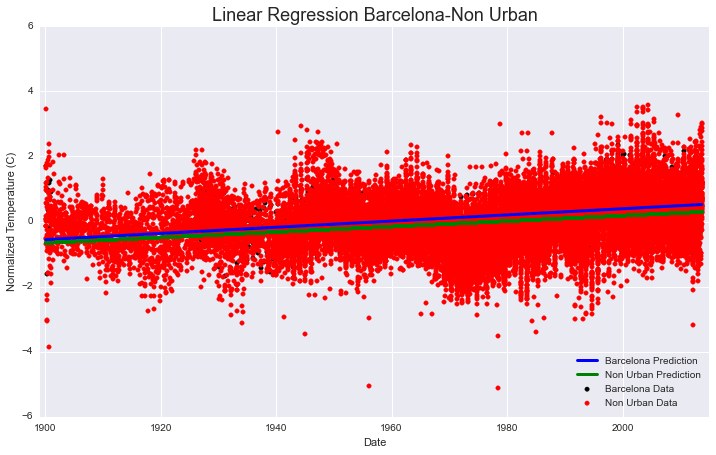

In [14]:
#evolution grouping all stations by Date
df_Barcelona_bydate = df_Barcelona.pivot_table(index='Date',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

#Barcelona regression
regr = linear_model.LinearRegression()
Barcelona_X = pd.DataFrame(df_Barcelona_bydate.index)
Barcelona_Y = pd.DataFrame(df_Barcelona_bydate.values)
regr.fit(Barcelona_X,Barcelona_Y)

#nonurban regression
df_nonurban = df_urban[df_urban.isUrban==0]
regr2 = linear_model.LinearRegression()
Non_Urban_X = pd.DataFrame(df_nonurban.Date)
Non_Urban_Y = pd.DataFrame(df_nonurban['Temperature Norm Smoothed (moving avg)'])
regr2.fit(Non_Urban_X,Non_Urban_Y)

# The coefficients
print "Barcelona"
print 'Coefficients:', round(regr.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(Barcelona_X) - Barcelona_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Barcelona_X, Barcelona_Y) )

print "\nNON Urban"
print 'Coefficients:', round(regr2.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(Non_Urban_X) - Non_Urban_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(Non_Urban_X, Non_Urban_Y))

# Plot outputs
plt.figure(figsize=(12,7))
plt.scatter(Barcelona_X, Barcelona_Y,  color='black', label='Barcelona Data')
plt.plot(Barcelona_X, regr.predict(Barcelona_X), color='blue',
         linewidth=3, label='Barcelona Prediction')

plt.scatter(Non_Urban_X, Non_Urban_Y,  color='red', label = 'Non Urban Data')
plt.plot(Non_Urban_X, regr2.predict(Non_Urban_X), color='green',
         linewidth=3, label = 'Non Urban Prediction')
plt.xlim((1899,2015))
plt.title('Linear Regression Barcelona-Non Urban', fontsize=18)
plt.legend(loc=4 , scatterpoints = 1)
plt.xlabel('Date')
plt.ylabel('Normalized Temperature (C)')
plt.show()

3) Regression Barcelona vs nonUrban by Date and not grouping nonurban stations and Year > 1970

In [15]:
df_Barcelona70 = df_Barcelona[df_Barcelona.Year>1969]
df_Barcelona_bydate70 = df_Barcelona70.pivot_table(index='Date',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

Barcelona
Coefficients: 0.0357
Residual sum of squares: 0.39
Variance score: 0.34

NON Urban
Coefficients: 0.0291
Residual sum of squares: 0.52
Variance score: 0.20


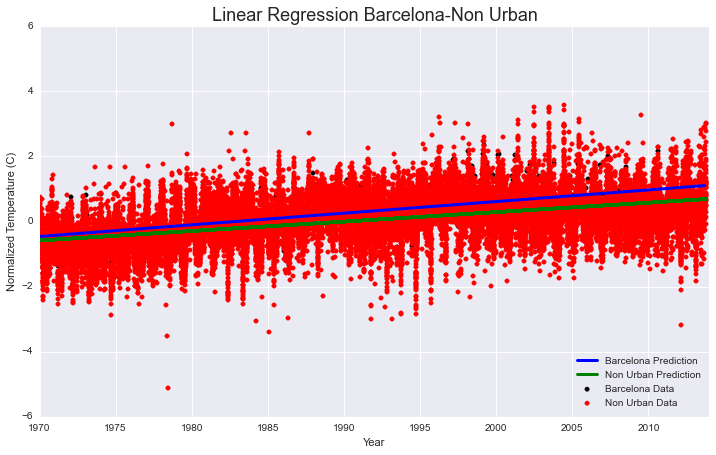

In [16]:
#Barcelona regression
regr = linear_model.LinearRegression()
Barcelona_X = pd.DataFrame(df_Barcelona_bydate70.index)
Barcelona_Y = pd.DataFrame(df_Barcelona_bydate70.values)
regr.fit(Barcelona_X,Barcelona_Y)

#nonurban regression
df_nonurban = df_urban[df_urban.isUrban==0]
df_nonurban70 = df_nonurban[df_nonurban.Year>1969]
regr2 = linear_model.LinearRegression()
Non_Urban_X = pd.DataFrame(df_nonurban70.Date)
Non_Urban_Y = pd.DataFrame(df_nonurban70['Temperature Norm Smoothed (moving avg)'])
regr2.fit(Non_Urban_X,Non_Urban_Y)

# The coefficients
print "Barcelona"
print 'Coefficients:', round(regr.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(Barcelona_X) - Barcelona_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Barcelona_X, Barcelona_Y) )

print "\nNON Urban"
print 'Coefficients:', round(regr2.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(Non_Urban_X) - Non_Urban_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(Non_Urban_X, Non_Urban_Y))

# Plot outputs
plt.figure(figsize=(12,7))
plt.scatter(Barcelona_X, Barcelona_Y,  color='black', label='Barcelona Data')
plt.plot(Barcelona_X, regr.predict(Barcelona_X), color='blue',
         linewidth=3, label='Barcelona Prediction')

plt.scatter(Non_Urban_X, Non_Urban_Y,  color='red', label = 'Non Urban Data')
plt.plot(Non_Urban_X, regr2.predict(Non_Urban_X), color='green',
         linewidth=3, label = 'Non Urban Prediction')
plt.xlim((1970,2014))
plt.title('Linear Regression Barcelona-Non Urban', fontsize=18)
plt.legend(loc=4 , scatterpoints = 1)
plt.xlabel('Year')
plt.ylabel('Normalized Temperature (C)')
plt.show()

Plot with seaborn

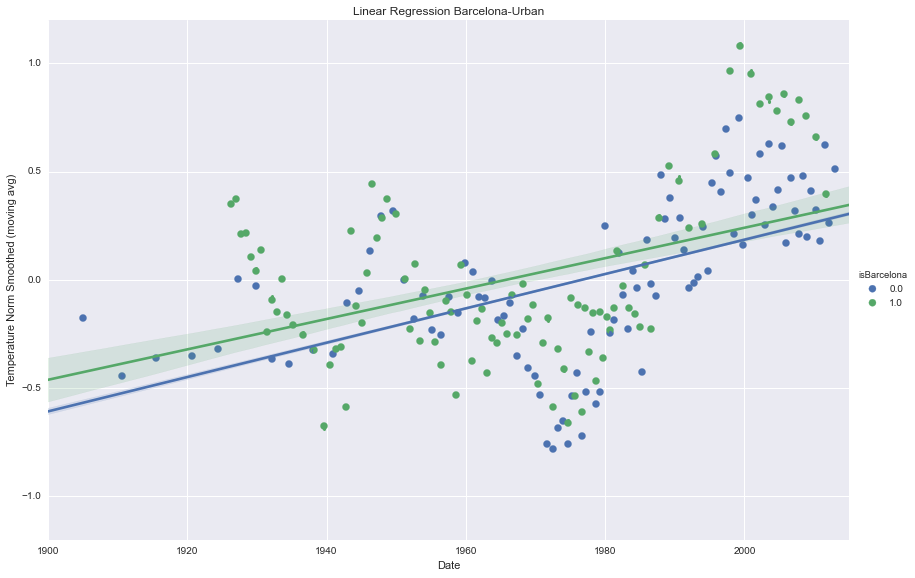

In [17]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])
df_urban['isBarcelona'] = df_urban['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban.isBarcelona = df_urban.isBarcelona.fillna(0)

#x_bins t'agrupa les x del plot perquè quedi més visual / x_ci ajusta l'ombra de la regressió amb l'interval de confiança que dones
lm = sns.lmplot(x="Date", y="Temperature Norm Smoothed (moving avg)", hue="isBarcelona", data=df_urban, size = 8, x_bins = 100, x_ci = 0.95,aspect=1.5).set(xlim=(1900,2015),ylim=(-1.2,1.2),title='Linear Regression Barcelona-Urban')

A regression with isBarcelona and its interaction with Date is done in order to check the significancy of the difference seen before. The interaction shows that the difference is not significant

In [18]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])
df_urban['isBarcelona'] = df_urban['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban.isBarcelona = df_urban.isBarcelona.fillna(0)

X_stats = df_urban['Temperature Norm Smoothed (moving avg)']
Y_stats = df_urban[['Date','isBarcelona']]
Y_stats ['Date*isBarcelona'] = df_urban['Date']*df_urban['isBarcelona']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.072
Model:                                                OLS   Adj. R-squared:                  0.072
Method:                                     Least Squares   F-statistic:                     2271.
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):               0.00
Time:                                            08:28:01   Log-Likelihood:                -99457.
No. Observations:                                   88370   AIC:                         1.989e+05
Df Residuals:                                       88366   BIC:                         1.990e+05
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Repeating for year > 1970, to analyze the second part of the graph that shows a different trend after the valley:

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\pandas\core\generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


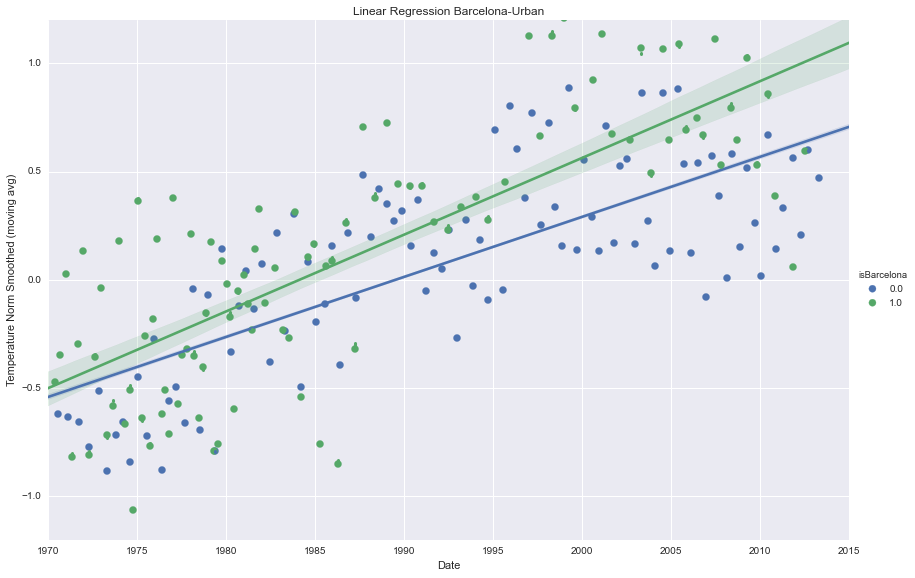

In [19]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])

df_urban70 = df_urban[df_urban.Year>1969]
df_urban70['isBarcelona'] = df_urban70['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban70.isBarcelona = df_urban70.isBarcelona.fillna(0)

#x_bins t'agrupa les x del plot perquè quedi més visual / x_ci ajusta l'ombra de la regressió amb l'interval de confiança que dones
lm = sns.lmplot(x="Date", y="Temperature Norm Smoothed (moving avg)", hue="isBarcelona", data=df_urban70, x_bins = 100, size = 8,  x_ci = 0.95,aspect=1.5).set(xlim=(1970,2015),ylim=(-1.2,1.2),title='Linear Regression Barcelona-Urban')

A regression with isBarcelona and its interaction with Date is done in order to check the significancy of the difference seen before. The interaction shows that the difference is significant, so Barcelona temperature is increasing more than in other stations since 1970

In [20]:
df_Barcelona_stations = df_Barcelona_stations.set_index(df_Barcelona_stations['Station ID'])

df_urban70 = df_urban[df_urban.Year>1969]
df_urban70['isBarcelona'] = df_urban70['Station ID'].map(df_Barcelona_stations.isUrban)
df_urban70.isBarcelona = df_urban70.isBarcelona.fillna(0)

X_stats = df_urban70['Temperature Norm Smoothed (moving avg)']
Y_stats = df_urban70[['Date','isBarcelona']]
Y_stats ['Date*isBarcelona'] = df_urban70['Date']*df_urban70['isBarcelona']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.187
Model:                                                OLS   Adj. R-squared:                  0.187
Method:                                     Least Squares   F-statistic:                     4384.
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):               0.00
Time:                                            08:28:13   Log-Likelihood:                -62502.
No. Observations:                                   57255   AIC:                         1.250e+05
Df Residuals:                                       57251   BIC:                         1.250e+05
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

Barcelona Temperature has increased 0.7ºC/100 years in the longer window and 3.5ºC in last 40 years trend

In [24]:
X_stats = df_Barcelona['Temperature Norm Smoothed (moving avg)']
Y_stats = df_Barcelona['Date']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.054
Model:                                                OLS   Adj. R-squared:                  0.054
Method:                                     Least Squares   F-statistic:                     101.7
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):           2.72e-23
Time:                                            08:31:16   Log-Likelihood:                -1865.1
No. Observations:                                    1769   AIC:                             3734.
Df Residuals:                                        1767   BIC:                             3745.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [22]:
df_Barcelona70 = df_Barcelona[df_Barcelona.Year>1969]

X_stats = df_Barcelona70['Temperature Norm Smoothed (moving avg)']
Y_stats = df_Barcelona70['Date']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.303
Model:                                                OLS   Adj. R-squared:                  0.302
Method:                                     Least Squares   F-statistic:                     344.4
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):           3.86e-64
Time:                                            08:29:28   Log-Likelihood:                -819.11
No. Observations:                                     796   AIC:                             1642.
Df Residuals:                                         794   BIC:                             1652.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          